# Final Phase Project
## Douglas McArthur

## Code Setup
As well as importing the required code libraries, it was necessary to add a temporary environment variable to prevent a warning message relating to KMeans having a memory leak issue on Windows.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from simulation import Simulation
from settings import Settings

## Part 1

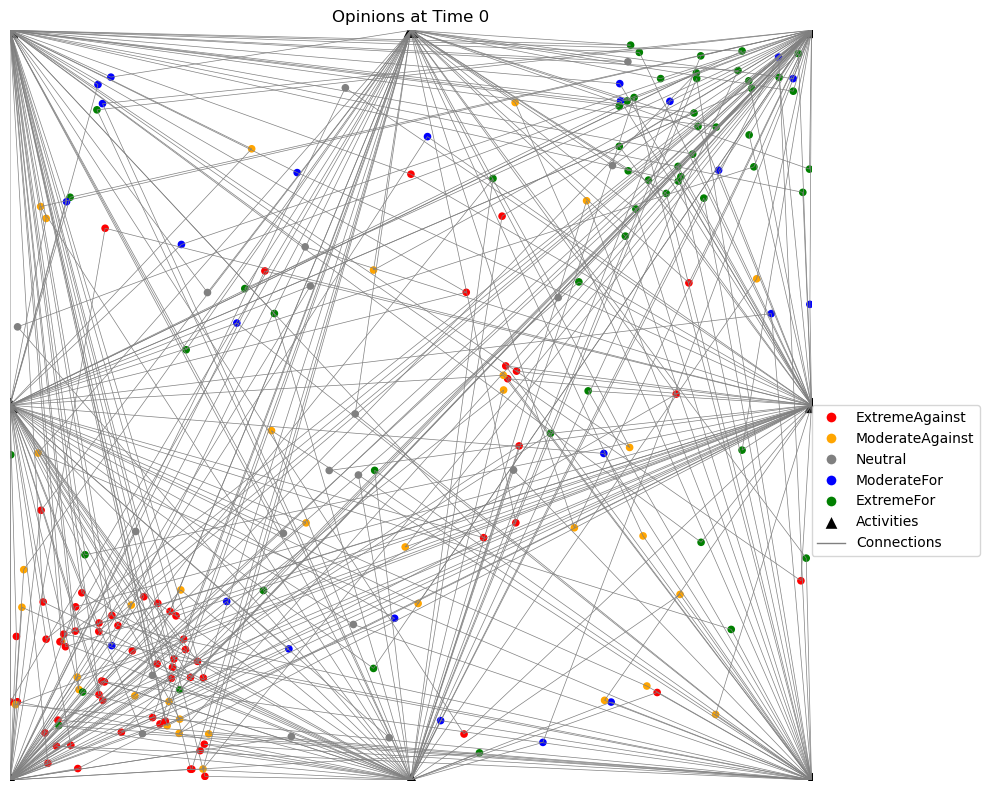

In [5]:
settings = Settings()
s = Simulation(settings)
s.run()
s.plot_network(0)

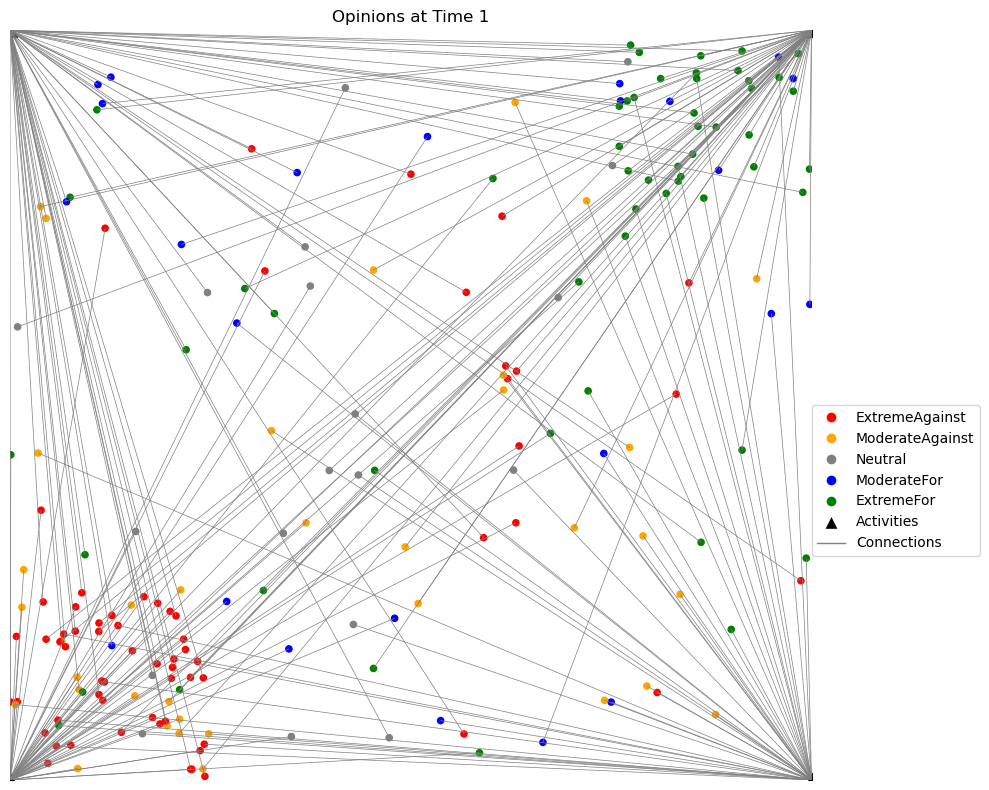

In [6]:
s.plot_network(1)

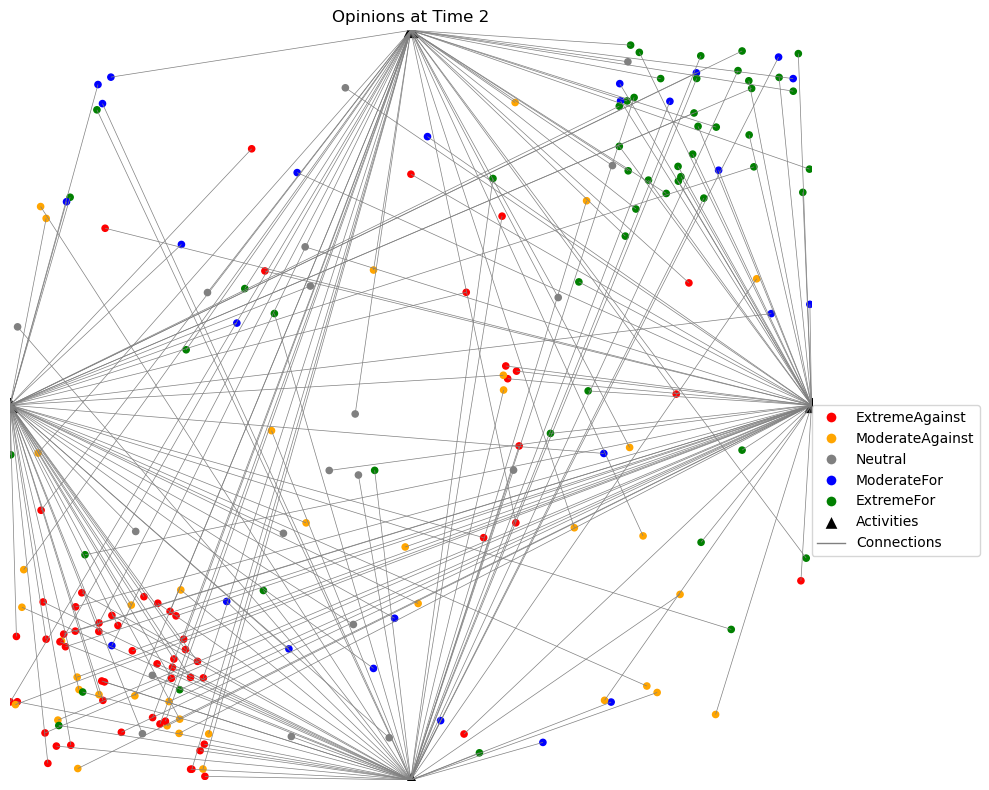

In [7]:
s.plot_network(2)

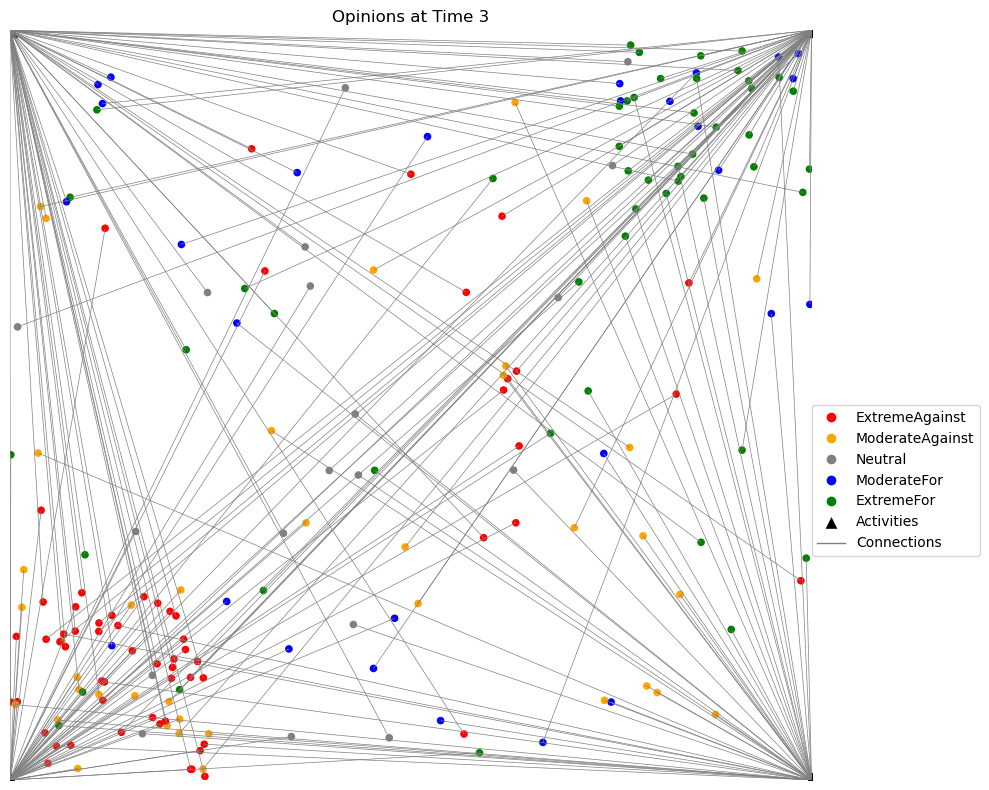

In [8]:
s.plot_network(3)

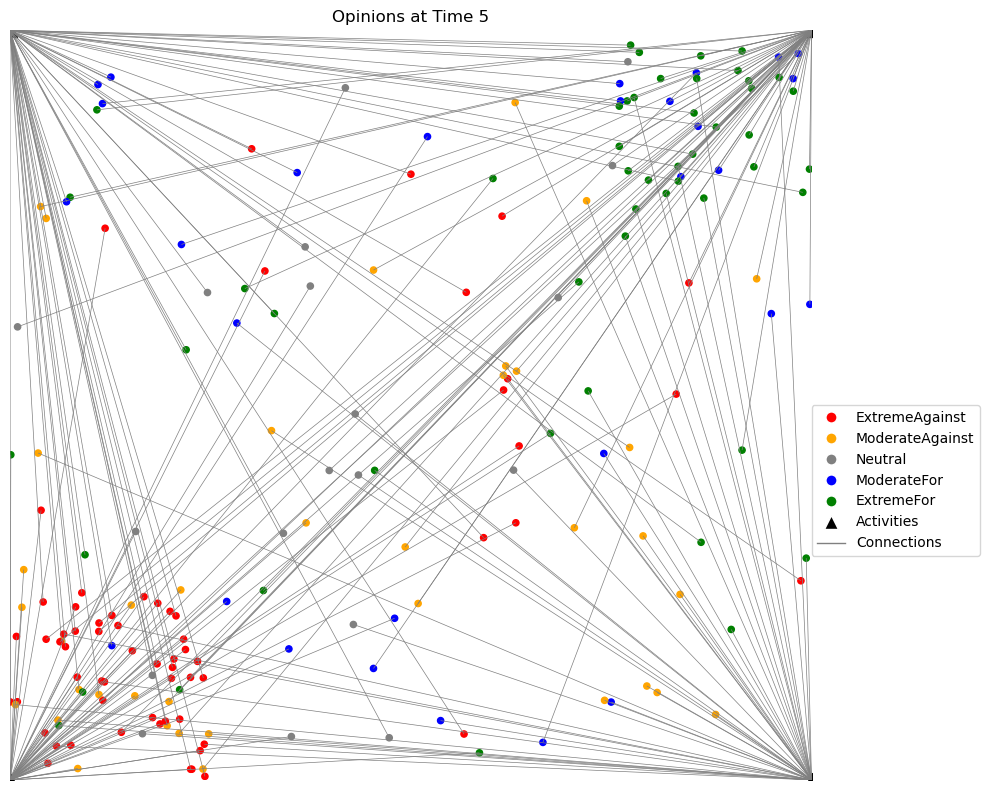

In [9]:
s.plot_network(5)

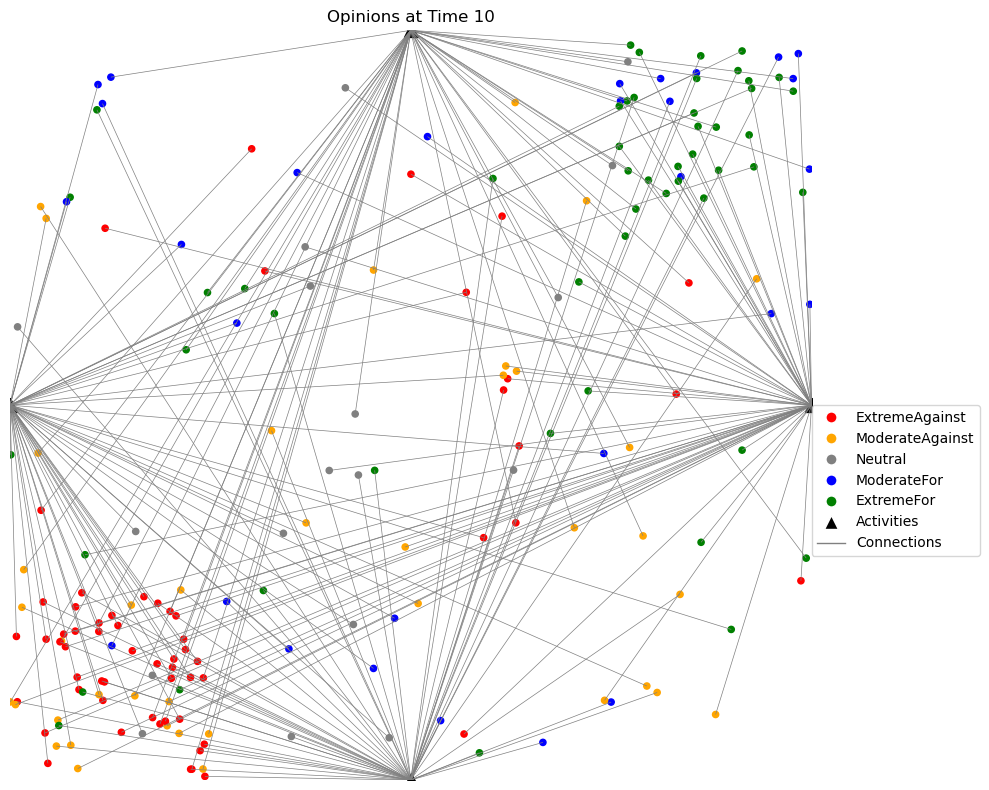

In [10]:
s.plot_network(10)

## Part 2

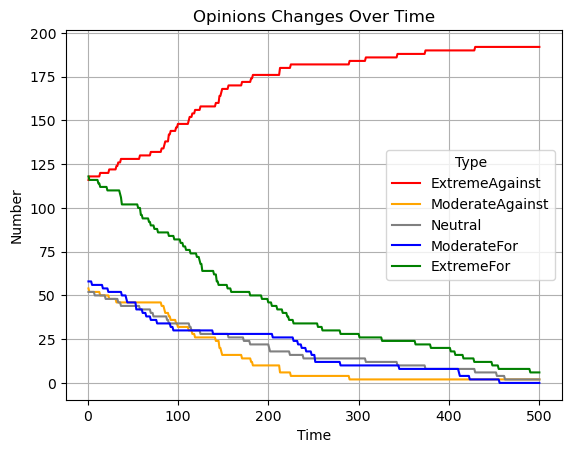

In [12]:
settings = Settings(beta_update=0)
s = Simulation(settings)
s.run()
s.chart()

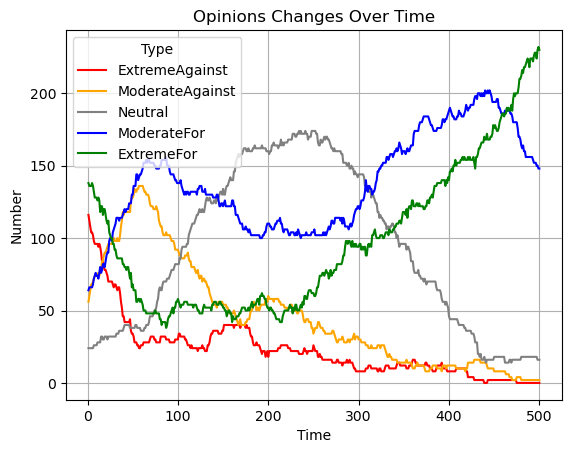

In [13]:
settings = Settings()
s = Simulation(settings)
s.run()
s.chart()

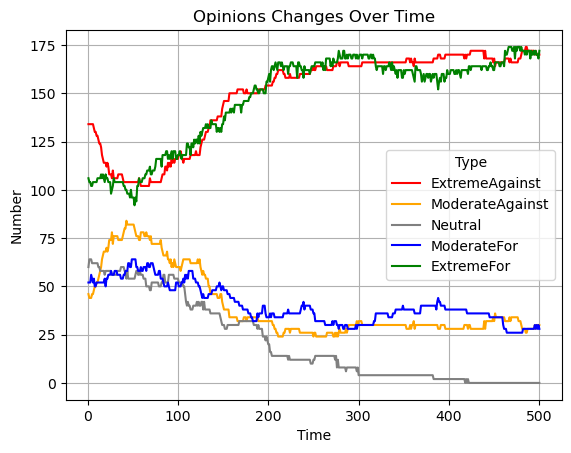

In [14]:
settings = Settings(lambda_dist=100)
s = Simulation(settings)
s.run()
s.chart()

## Part 3

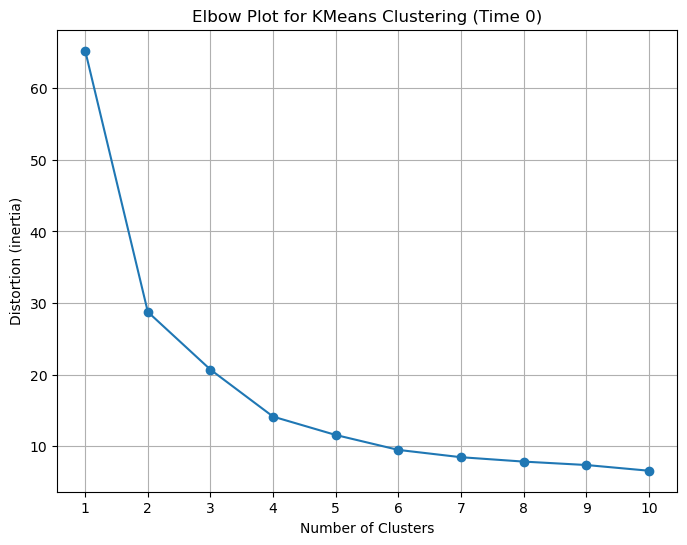

In [16]:
settings = Settings()
s = Simulation(settings)
s.run()
s.get_elbow_plot(0)

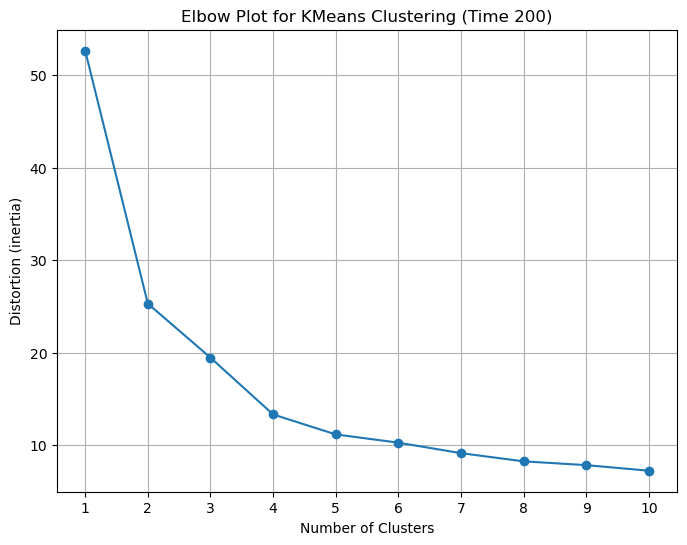

In [17]:
s.get_elbow_plot(200)

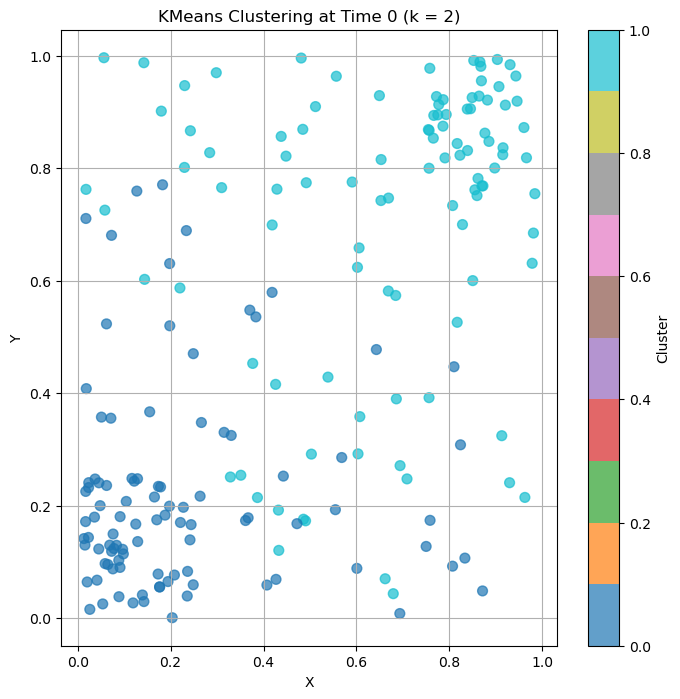

In [34]:
s.kmeans_clustering(0, 2)

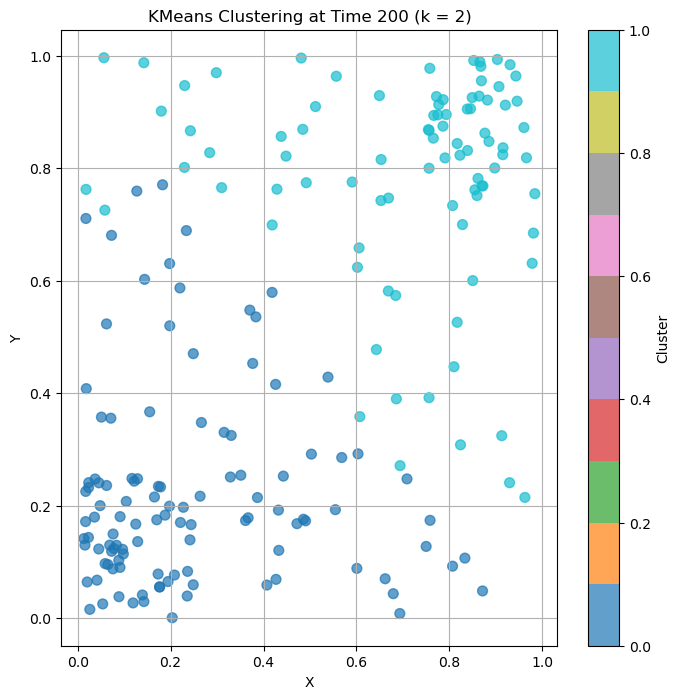

In [36]:
s.kmeans_clustering(200, 2)

## Ensemble Statistics

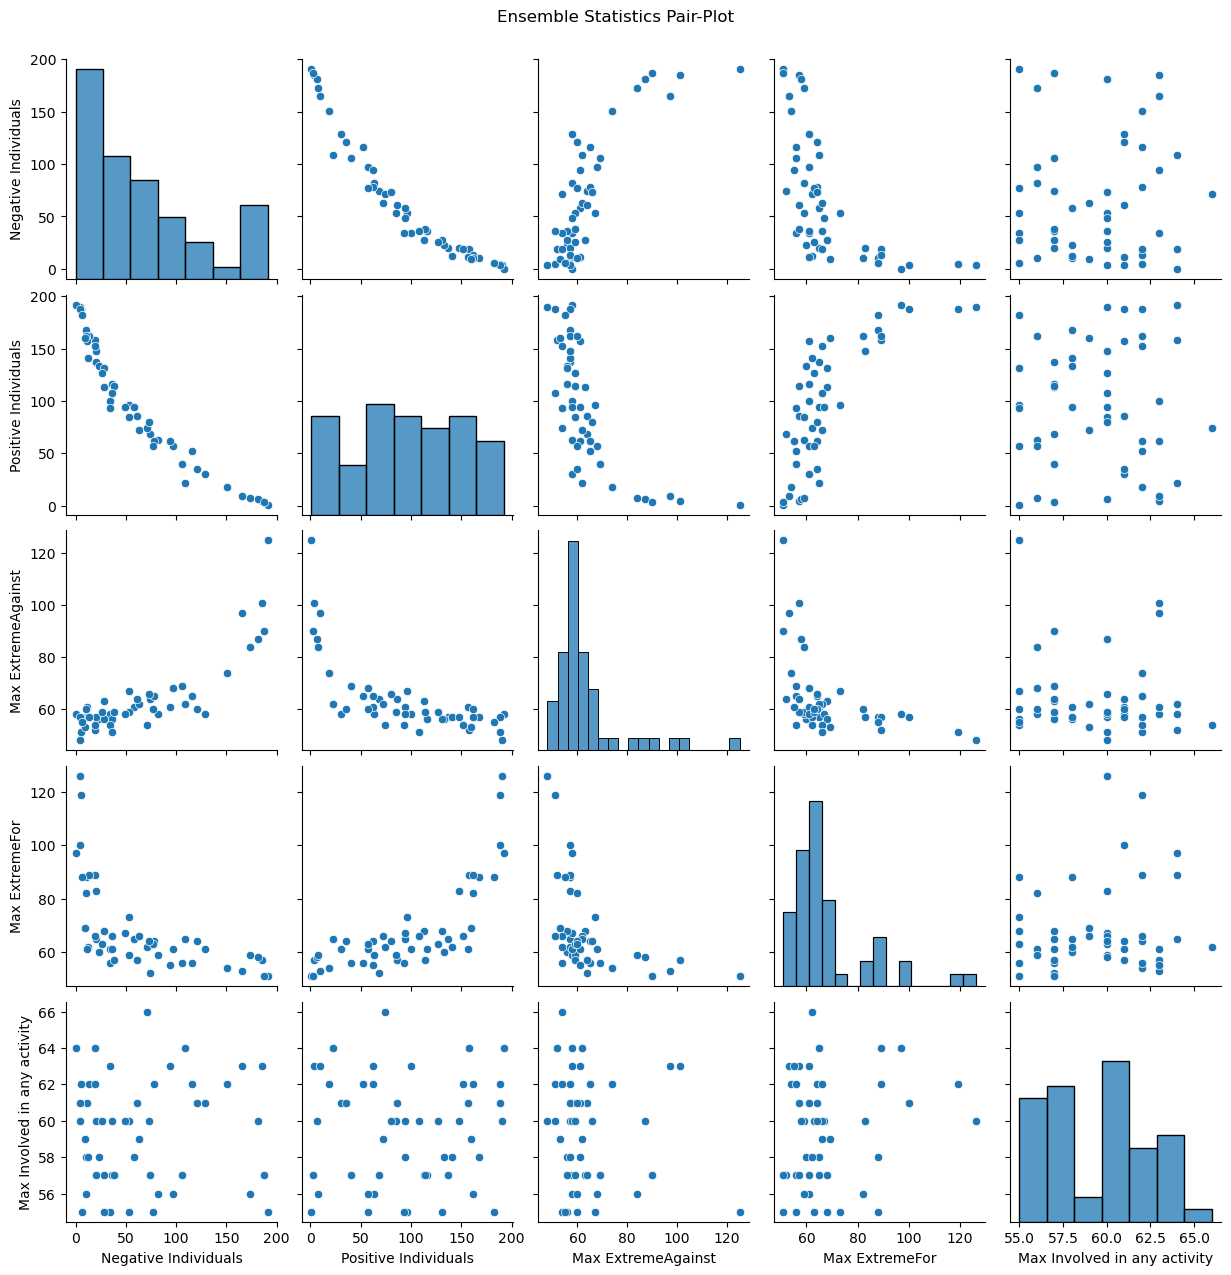

Negative Individuals  Positive Individuals  Max ExtremeAgainst  \
0                    151                    18                  74   
1                     20                   137                  57   
2                     34                   100                  58   
3                     36                   116                  56   
4                     28                   113                  63   
5                     53                    96                  67   
6                     10                   168                  57   
7                     23                   133                  56   
8                     19                   158                  52   
9                      5                   188                  51   
10                    74                    68                  64   
11                    58                    94                  61   
12                   116                    52                  65   
13                    63                    72                  62   
14                    82                    63                  58   
15                    61                    86                  64   
16                    12                   141                  57   
17                    53                    85                  59   
18                    20                   148                  57   
19                   191                     1                 125   
20                     4                   190                  48   
21                    13                   162                  57   
22                    97                    57                  68   
23                    34                    93                  54   
24                   185                     4                 101   
25                   165                     9                  97   
26                    11                   157                  61   
27                    49                    94                  58   
28                   109                    22                  62   
29                   106                    40                  69   
30                   129                    30                  58   
31                    28                   131                  56   
32                    38                   114                  59   
33                    78                    62                  65   
34                   181                     6                  87   
35                    26                   127                  59   
36                    10                   162                  60   
37                     9                   160                  53   
38                    71                    74                  54   
39                   187                     3                  90   
40                     0                   192                  58   
41                    19                   152                  54   
42                    36                   108                  51   
43                    94                    62                  61   
44                     4                   188                  57   
45                   121                    35                  60   
46                    77                    57                  60   
47                     6                   182                  55   
48                   173                     7                  84   
49                    73                    80                  66   

    Max ExtremeFor  Max Involved in any activity  
0               54                            62  
1               65                            57  
2               61                            63  
3               61                            57  
4               68                            57  
5               73                            55  
6               88                            58  
7               60       

In [2]:
settings = Settings(n=200)
Simulation.ensemble_statistics(50, settings)

## Linear Regression Exploration

Simulation setup: default settings.

In [3]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd
import numpy as np

settings = Settings()
simulation = Simulation(settings)
simulation.run()
print(simulation.activity_summary(500))

category  ExtremeAgainst  ModerateAgainst  Neutral  ModerateFor  ExtremeFor
Activity                                                                   
200                   14               40        3            0           2
201                    5               22       11            4           1
202                    9               21       12            1           3
203                    0                0       12           27          13
204                   12               28        8            4           4
205                    1               26       14            9           5
206                    5                8       11           14           7
207                   10               21        5            5           3


In [ ]:
Function to find "best" model.

In [5]:
def find_best_model(simulation, predictors_pool):
    """
    Find the best model based on adjusted R² using exhaustive search over all predictor combinations.
    
    Args:
        simulation: Instance of the simulation class with `fit_regression_model` defined.
        predictors_pool (list): List of all potential predictors.
    
    Returns:
        Best model summary and the set of predictors used.
    """
    best_model = None
    best_adj_r2 = -np.inf
    best_predictors = None

    # Test all possible combinations of predictors
    for r in range(1, len(predictors_pool) + 1):  # Iterate over subset sizes
        for subset in combinations(predictors_pool, r):
            model = simulation.fit_regression_model(predictors=list(subset))
            adj_r2 = model.rsquared_adj  # Adjusted R²
            
            # Check if this model is "better"
            if adj_r2 > best_adj_r2:
                best_model = model
                best_adj_r2 = adj_r2
                best_predictors = subset

    return best_model, best_predictors

In [13]:
# Define the list of all potential predictors
predictors_pool = [
    "InitialOpinion",
    "DistanceToCentre",
    "NearestActivityDistance"
] 

# Find the best model
best_model, best_predictors = find_best_model(simulation, predictors_pool)

print(f"Best Adjusted R²: {best_model.rsquared_adj}")
print(f"Best Predictors: {best_predictors}")

# Compare to full model
full_model = simulation.fit_regression_model()
print(f"Full model Adjusted R²: {full_model.rsquared_adj}")

Best Adjusted R²: 0.18526295682051652
Best Predictors: ('InitialOpinion', 'DistanceToCentre')
Full model Adjusted R²: 0.5145874742029256


In [15]:
mse_0 = simulation.cross_validate_model() # Full model
mse_1 = simulation.cross_validate_model(["InitialOpinion"])
mse_2 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre"])
mse_3 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre", "NearestActivityDistance"])
print(f"0: {mse_0} 1: {mse_1} 2: {mse_2} 3: {mse_3}")

0: 0.028566024396574238 1: 0.044774428192184725 2: 0.04471523837504174 3: 0.045820083387975136
